# Packages

In [54]:
# data handling
import numpy as np
import pandas as pd

# modeling
from sklearn.cluster import KMeans

# prepare sample data
from sklearn.datasets.samples_generator import make_blobs

# data visualisation
from plotnine import *

# Data Preparation

## Data Creation

In [55]:
X, y_true = make_blobs(n_samples=1000, 
                       centers=3,
                       cluster_std=1, 
                       random_state=123)

In [56]:
df = pd.DataFrame(X)
df.columns = ['x', 'y']
df['y_true'] = [str(i) for i in y_true.tolist()]

## Data Visualisation

The graph shows the true labels of the clusters. The clusters are also clearly distinguishable.

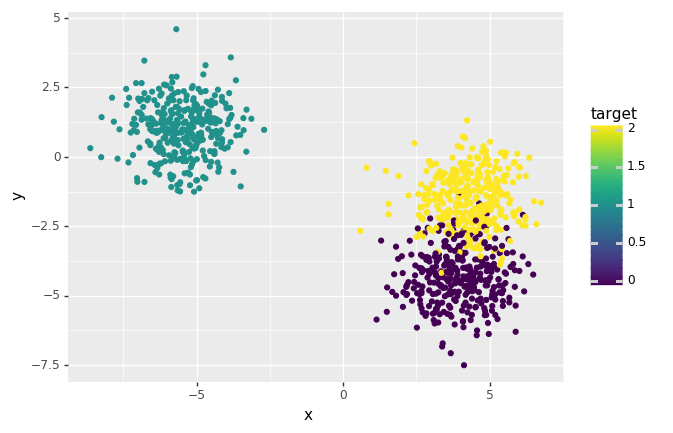

<ggplot: (-9223371895704540363)>

In [57]:
(ggplot(df) + 
    aes(x='x', y='y', color=y_true) +
    geom_point() +
    labs(x='x', y='y', color='target')
)

# Modeling

Fit the model

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the cluster centers

In [87]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['x', 'y']

Create Predictions

In [65]:
df['y_kmeans'] = kmeans.predict(X)

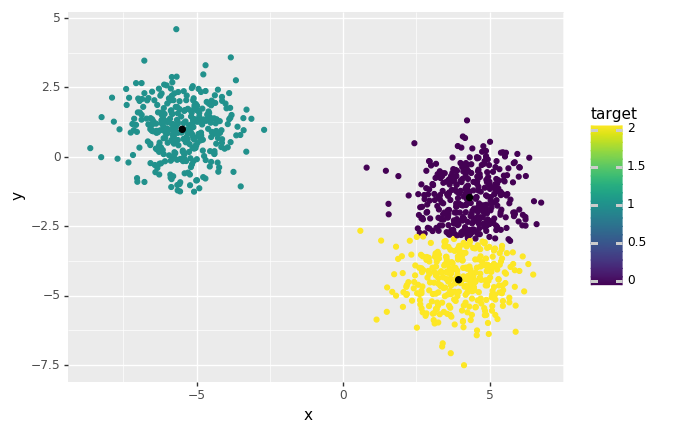

<ggplot: (-9223371895706864808)>

In [90]:
(ggplot(data=df, mapping=aes(x='x', y='y')) +
    geom_point(mapping=aes(color='y_kmeans')) +
    geom_point(data=centers, mapping=aes(x='x', y='y'), color='black', size=2) +
    labs(x='x', y='y', color='target')
) 

We see that the three groups are distinguished nicely.